# COSC311 - HW3 by Jase Gambrill

1. Regression on the Computer Hardware Dataset

Please download the "Computer Hardware" dataset (https://archive.ics.uci.edu/dataset/29/computer+hardware ). Unzip it and use the "machine.data" to conduct the following regression tasks. Assume the 3-8 columns of this dataset are attributes, and the last column ("ERP") is the ground truth.

    • Task 1: Measure the correlation between each attribute and the "ERP" and select the most important 4 attributes for the following regression analysis;

    • Task 2: Using the above 4 attributes and the "ERP" (ground truth) as the dataset, split it into two parts, 60% for training and 40% for testing.

    • Task 3: Using training data to build a multiple linear regression model, and evaluate it using the testing data. Show the MAE, MSE, and RMSE

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

data = pd.read_csv("machine.data", header=None, delimiter=',')

#Defines the ERP
y = data.iloc[:, -1]

#Calculates correlations and selects the top attributes
correlations = {}
for n in range(2, 8):
    X = data.iloc[:, n].values
    correlations[n] = np.corrcoef(X, y)[0, 1]

# Sorts and selects the top 4 correlations
top_attributes = sorted(correlations, key=correlations.get, reverse=True)[:4]
print("Selected attributes based on top correlations:", top_attributes)
print()

X = data.iloc[:, [x-1 for x in top_attributes]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("Linear Regression Score:",regr.score(X_test, y_test))
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

Selected attributes based on top correlations: [4, 3, 5, 6]

Linear Regression Score: 0.8784504576120592
MAE: 35.14449556029507
MSE: 1974.8829943796497
RMSE: 44.43965565100218


/home/omniladder/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2. Clustering on Hand-Written Digits

Please use the UCI ML hand-written digits dataset in our lecture note
"COSC311_Module5_4_Kmeans clustering", which is included in the scikit-learn datasets.

    • Task 1: Conduct PCA analysis on the dataset and find out how many principal components are needed to keep at least 85% variance (i.e. the ratio of variance loss, η, is less than 15%).

    • Task 2: Assume m principal components are needed to keep at least 85% variance, transform the dataset from 64 dimensions to m dimensions.

    • Task 3: Based on the above dimension-reduced dataset, conduct k-means clustering (k = 10, each cluster is a digit), output the center of each cluster.

    • Task 4: Match each learned cluster label with the true label (i.e. ground truth) using mode function in scipy.stats package (i.e. based on most common value), calculate and output the clustering accuracy, and show the corresponding confusion matrix as a figure.

Number of components to keep at least 85% variance: 17


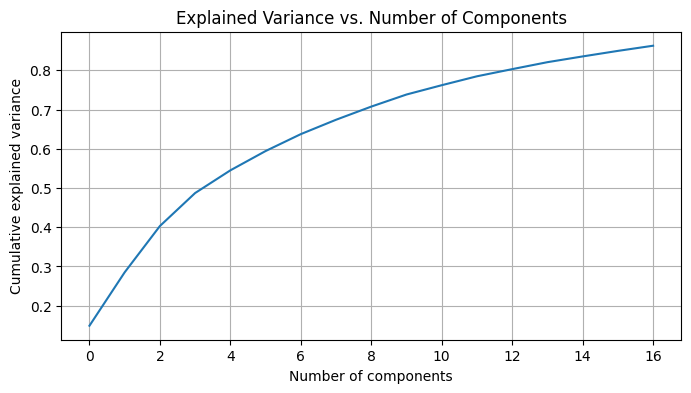

Cluster centers (in transformed space):
(10, 17)

Clustering accuracy: 0.7284362826933779


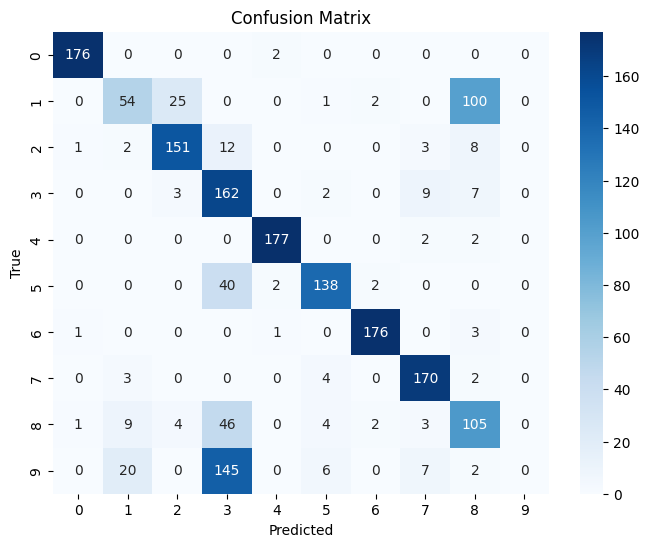

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# PCA to find the number of components to retain at least 85% variance
pca = PCA(n_components=0.85)
X_reduced = pca.fit_transform(X)
print("Number of components to keep at least 85% variance:", pca.n_components_)

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_reduced)
cluster_centers = kmeans.cluster_centers_
print("Cluster centers (in transformed space):")
print(cluster_centers.shape)
print()

# Matching cluster labels with true labels
labels = np.zeros_like(kmeans.labels_)
for i in range(10):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(y[mask])[0]

# Calculate the clustering accuracy
acc = accuracy_score(y, labels)
print("Clustering accuracy:", acc)

# Confusion matrix
conf_mat = confusion_matrix(y, labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()